# Business Understanding

# Data Understanding

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [111]:
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)
#keep in mind what the dataframe means. these are accidents.
#go through what columns to keep and rows by null values. might be ~50,000 values.

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [113]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Data Preparation

I will only be accounting for airline make and models that are in the United States, so I will be removing any rows that are not the United States. Because I am measuring off of total fatal injuries, total serious injuries, total minor injuries, total uninjured, and injury severity, I will remove unnecessary columns. In addition to this, I'll keep some conditions to track safety. These safety conditions to keep in mind are number of engines, engine type, amateur built, weather condition, and flight level.

The reason I am only viewing the United States crashes is because there is low cardinality and low uniform data. Taking into account only US accidents will still give me a chance to analyze majority of the data in our dataframe.

In [114]:
#First I want to examine all columns in the data
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [115]:
#Creating a dataframe that only shows accidents in the United States
df_us = df[df['Country'] == 'United States']
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82248 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                82248 non-null  object 
 1   Investigation.Type      82248 non-null  object 
 2   Accident.Number         82248 non-null  object 
 3   Event.Date              82248 non-null  object 
 4   Location                82237 non-null  object 
 5   Country                 82248 non-null  object 
 6   Latitude                32265 non-null  object 
 7   Longitude               32255 non-null  object 
 8   Airport.Code            49189 non-null  object 
 9   Airport.Name            51654 non-null  object 
 10  Injury.Severity         82140 non-null  object 
 11  Aircraft.damage         80269 non-null  object 
 12  Aircraft.Category       28154 non-null  object 
 13  Registration.Number     82197 non-null  object 
 14  Make                    82227 non-null

In [116]:
#I will now remove unwanted columns
#I am removing Country because these are all already United States accidents
cols_to_remove = ['Investigation.Type','Accident.Number','Event.Date','Location','Country',
                  'Aircraft.damage','Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 
                  'Registration.Number', 'FAR.Description', 'Report.Status', 'Publication.Date']
df_us = df_us.drop(columns = cols_to_remove)
df_us.head()

,Event.Id,Injury.Severity,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,Fatal(2),NaN,Stinson,108-3,No,1.0,Reciprocating,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise
1,20001218X45447,Fatal(4),NaN,Piper,PA24-180,No,1.0,Reciprocating,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown
2,20061025X01555,Fatal(3),NaN,Cessna,172M,No,1.0,Reciprocating,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise
3,20001218X45448,Fatal(2),NaN,Rockwell,112,No,1.0,Reciprocating,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise
4,20041105X01764,Fatal(1),NaN,Cessna,501,No,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach


In [117]:
#Because our business problem is which aircraft is lowest risk, I am curious about looking at the value counts
df_us['Aircraft.Category'].value_counts()

Airplane             24229
Helicopter            2723
Glider                 503
Balloon                229
Gyrocraft              172
Weight-Shift           161
Powered Parachute       90
Ultralight              25
WSFT                     9
Unknown                  4
Blimp                    4
Powered-Lift             3
ULTR                     1
Rocket                   1
Name: Aircraft.Category, dtype: int64

In [118]:
#Here I want to figure out how to handle my NaN values for Aircraft.Category
df_us['Aircraft.Category'].isna().sum()

54094

In [119]:
#There a lot of missing aircraft categories that are NaNs. 
#Because these NaN values are associated to Airplane Makes, I'll convert these values to 'Airplane'
df_us['Aircraft.Category'] = df_us['Aircraft.Category'].fillna('Airplane')
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82248 entries, 0 to 90347
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                82248 non-null  object 
 1   Injury.Severity         82140 non-null  object 
 2   Aircraft.Category       82248 non-null  object 
 3   Make                    82227 non-null  object 
 4   Model                   82210 non-null  object 
 5   Amateur.Built           82227 non-null  object 
 6   Number.of.Engines       80373 non-null  float64
 7   Engine.Type             79225 non-null  object 
 8   Schedule                10297 non-null  object 
 9   Purpose.of.flight       79819 non-null  object 
 10  Air.carrier             14495 non-null  object 
 11  Total.Fatal.Injuries    71594 non-null  float64
 12  Total.Serious.Injuries  70873 non-null  float64
 13  Total.Minor.Injuries    71519 non-null  float64
 14  Total.Uninjured         77243 non-null

In [120]:
#The next thing I would want to analyze is how to manage the NaN values for the columns I'm evaluating.
#For this exercise, I will assume the NaN values can just be 0.0, in this context/data NaN would mean no injury.
#If there is a NaN value in any of my injury columns, it means there are no injuries.
#Although there are other columns with NaN values, I will only worry for now about my injury columns.

df_us['Total.Fatal.Injuries'] = df_us['Total.Fatal.Injuries'].fillna(0.0)
df_us['Total.Serious.Injuries'] = df_us['Total.Serious.Injuries'].fillna(0.0)
df_us['Total.Minor.Injuries'] = df_us['Total.Minor.Injuries'].fillna(0.0)
df_us['Total.Uninjured'] = df_us['Total.Uninjured'].fillna(0.0)

In [121]:
#Verify it worked and filled NaN with 0.0
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82248 entries, 0 to 90347
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                82248 non-null  object 
 1   Injury.Severity         82140 non-null  object 
 2   Aircraft.Category       82248 non-null  object 
 3   Make                    82227 non-null  object 
 4   Model                   82210 non-null  object 
 5   Amateur.Built           82227 non-null  object 
 6   Number.of.Engines       80373 non-null  float64
 7   Engine.Type             79225 non-null  object 
 8   Schedule                10297 non-null  object 
 9   Purpose.of.flight       79819 non-null  object 
 10  Air.carrier             14495 non-null  object 
 11  Total.Fatal.Injuries    82248 non-null  float64
 12  Total.Serious.Injuries  82248 non-null  float64
 13  Total.Minor.Injuries    82248 non-null  float64
 14  Total.Uninjured         82248 non-null

In [122]:
df_us.head()

,Event.Id,Injury.Severity,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,Fatal(2),Airplane,Stinson,108-3,No,1.0,Reciprocating,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise
1,20001218X45447,Fatal(4),Airplane,Piper,PA24-180,No,1.0,Reciprocating,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown
2,20061025X01555,Fatal(3),Airplane,Cessna,172M,No,1.0,Reciprocating,NaN,Personal,NaN,3.0,0.0,0.0,0.0,IMC,Cruise
3,20001218X45448,Fatal(2),Airplane,Rockwell,112,No,1.0,Reciprocating,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise
4,20041105X01764,Fatal(1),Airplane,Cessna,501,No,NaN,NaN,NaN,Personal,NaN,1.0,2.0,0.0,0.0,VMC,Approach


# Exploratory Data Analysis

First I plan on selecting the safest aircraft category by the number of engines. The more number of engines an aircraft has, the safer it is in flight. I'll create a bar chart that depicts number of engine per aircraft and fill NaN values as 1.0 because it is impossible for airplanes to fly without having at least 1 engine.

Next I plan to examine the ratio of injury counts for each airplane make. The injury categories I'll measure by are total fatal injuries, total serious injuries, total minor injuries, and total uninjured. Visualizing this ratio will tell me which airplane make has the lowest injurity ratio.

Lastly, I'll pick which model of the airplane's make has the lowest injury ratio. This is how I determine which airplane model is the safest to select.

In [127]:
#First convert NaN values from Number of Engines to 1
df_us['Number.of.Engines'] = df_us['Number.of.Engines'].fillna(1.0)

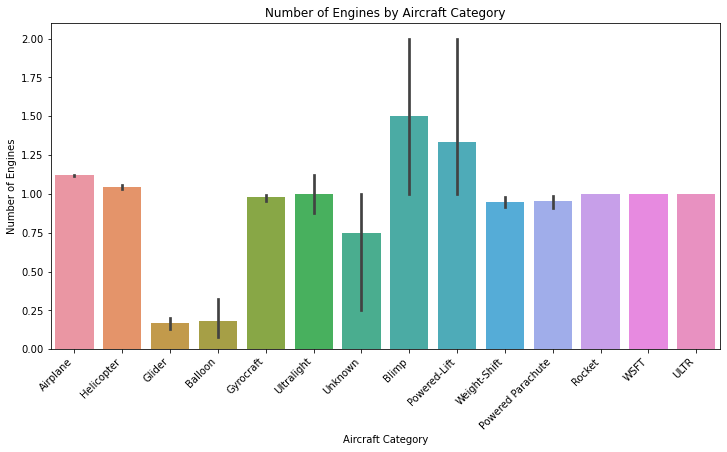

In [130]:
#Plot number of engines per aircraft category
plt.figure(figsize=(12, 6))

sns.barplot(x='Aircraft.Category', y='Number.of.Engines', data=df_us)

plt.title('Number of Engines by Aircraft Category')
plt.xlabel('Aircraft Category')
plt.ylabel('Number of Engines')

plt.xticks(rotation=45, ha='right')

plt.show()

In [150]:
#Showing count of top 3 categories of number of engines per Airplane, Blimp and Powered-Lift.
#Airplanes are a better sample size, so we will select Airplanes.
top3 = ['Airplane', 'Blimp', 'Powered-Lift']

category_counts = df[df['Aircraft.Category'].isin(top3)]['Aircraft.Category'].value_counts()

print(category_counts)

Airplane        27617
Powered-Lift        5
Blimp               4
Name: Aircraft.Category, dtype: int64


In [151]:
#It is clear that Powered-Lifts and Blimps do not have a large enough sample size compared to Airplanes.
#Now lets create a new dataframe to make our ratio calculations easier.
df_airplanes = df_us[df_us['Aircraft.Category'] == 'Airplane']
df_airplanes['Aircraft.Category'].value_counts()

Airplane    78323
Name: Aircraft.Category, dtype: int64

In [156]:
#Get the ratios of total fatal injuries per Make
result_df1 = df_airplanes.groupby('Make')['Total.Fatal.Injuries'].agg(['count', 'sum'])

result_df1['Ratio'] = result_df1['sum'] / result_df1['count']

#Get the top 10 highest counts, or else there will be too many rows/Makes to select from
top_10 = result_df1.nlargest(10, 'count')

print(top_10)

         count     sum     Ratio
Make                            
Cessna   21573  6480.0  0.300375
Piper    11661  4863.0  0.417031
CESSNA    4280  1061.0  0.247897
Beech     4167  2631.0  0.631389
PIPER     2507   785.0  0.313123
Bell      1609   534.0  0.331883
Boeing    1161  1322.0  1.138674
Grumman   1076   190.0  0.176580
Mooney    1074   528.0  0.491620
BEECH      892   486.0  0.544843


In [157]:
#Get the ratios of total serious injuries per Make
result_df2 = df_airplanes.groupby('Make')['Total.Serious.Injuries'].agg(['count', 'sum'])

result_df2['Ratio'] = result_df2['sum'] / result_df2['count']

#Get the top 10 highest counts, or else there will be too many rows/Makes to select from
top_10_2 = result_df2.nlargest(10, 'count')

print(top_10_2)

         count     sum     Ratio
Make                            
Cessna   21573  3322.0  0.153989
Piper    11661  2349.0  0.201441
CESSNA    4280  1155.0  0.269860
Beech     4167   804.0  0.192945
PIPER     2507   607.0  0.242122
Bell      1609   458.0  0.284649
Boeing    1161   487.0  0.419466
Grumman   1076   136.0  0.126394
Mooney    1074   195.0  0.181564
BEECH      892   220.0  0.246637


In [158]:
#Get the ratios of total minor injuries per Make
result_df3 = df_airplanes.groupby('Make')['Total.Minor.Injuries'].agg(['count', 'sum'])

result_df3['Ratio'] = result_df3['sum'] / result_df3['count']

#Get the top 10 highest counts, or else there will be too many rows/Makes to select from
top_10_3 = result_df3.nlargest(10, 'count')

print(top_10_3)

         count     sum     Ratio
Make                            
Cessna   21573  5842.0  0.270801
Piper    11661  3180.0  0.272704
CESSNA    4280   554.0  0.129439
Beech     4167  1106.0  0.265419
PIPER     2507   405.0  0.161548
Bell      1609   771.0  0.479180
Boeing    1161  1417.0  1.220500
Grumman   1076   241.0  0.223978
Mooney    1074   324.0  0.301676
BEECH      892   178.0  0.199552


In [ ]:
#Grumman appears to be the safest Make with the lowest total fatal injury and serious injury count among the top 10 Makes.
#Grumman may not have the lowest minor injury count, but this is not weighed as heavily as fatal and serious injuries.
#Now I'm going to figure out which Grumman Model is the safest.

In [159]:
#Now I'll create a dataframe of just Grumman Makes and look at the injury counts for various Grumman Models
df_grumman = df_airplanes[df_airplanes['Make'] == 'Grumman']
df_grumman['Make'].value_counts()

Grumman    1076
Name: Make, dtype: int64

In [161]:
#Get the ratios of total fatal injuries per Grumman Model
result_df4 = df_grumman.groupby('Model')['Total.Fatal.Injuries'].agg(['count', 'sum'])

result_df4['Ratio'] = result_df4['sum'] / result_df4['count']

#Get the top 10 highest counts, or else there will be too many rows/Makes to select from
top_10_4 = result_df4.nlargest(10, 'count')

print(top_10_4)

        count   sum     Ratio
Model                        
G-164A    353  17.0  0.048159
G-164B    188  13.0  0.069149
G-164      94   5.0  0.053191
AA-5B      41  11.0  0.268293
AA-5A      38  10.0  0.263158
G164       25   3.0  0.120000
AA-1B      24   7.0  0.291667
AA-5       22   6.0  0.272727
G164B      21   0.0  0.000000
G164A      19   5.0  0.263158


In [164]:
#Get the ratios of total serious injuries per Grumman Model
result_df5 = df_grumman.groupby('Model')['Total.Serious.Injuries'].agg(['count', 'sum'])

result_df5['Ratio'] = result_df5['sum'] / result_df5['count']

#Get the top 10 highest counts, or else there will be too many rows/Makes to select from
top_10_5 = result_df5.nlargest(10, 'count')

print(top_10_5)

        count   sum     Ratio
Model                        
G-164A    353  28.0  0.079320
G-164B    188  14.0  0.074468
G-164      94  14.0  0.148936
AA-5B      41   5.0  0.121951
AA-5A      38  13.0  0.342105
G164       25   5.0  0.200000
AA-1B      24   4.0  0.166667
AA-5       22   6.0  0.272727
G164B      21   0.0  0.000000
G164A      19   0.0  0.000000


In [165]:
#Get the ratios of total minor injuries per Grumman Model
result_df6 = df_grumman.groupby('Model')['Total.Minor.Injuries'].agg(['count', 'sum'])

result_df6['Ratio'] = result_df6['sum'] / result_df6['count']

#Get the top 10 highest counts, or else there will be too many rows/Makes to select from
top_10_6 = result_df6.nlargest(10, 'count')

print(top_10_6)

        count   sum     Ratio
Model                        
G-164A    353  52.0  0.147309
G-164B    188  21.0  0.111702
G-164      94  15.0  0.159574
AA-5B      41   7.0  0.170732
AA-5A      38  15.0  0.394737
G164       25   3.0  0.120000
AA-1B      24  11.0  0.458333
AA-5       22  10.0  0.454545
G164B      21   2.0  0.095238
G164A      19   2.0  0.105263


## Conclusions

I've determined which aircraft category to select based on number of engines while keeping sample size count. I've chosen airplanes as my selected aircraft category.

After selecting airplanes, I then chose my selected Airplane Make by creating injury ratios (fatal, serious and minor) of various Makes with the top 10 highest sample size counts to select my safest Make. I determined Grumman Makes had the lowest overall injury ratios, while weighing in fatal and serious ratios more heavily than minor injuries.

After creating these ratios I looked into specific Grumman models and performed the same ratio analysis for injury ratios (fatal, serious and minor) for the top 10 Grumman models. While keeping in mind sample size and weighing more heavily on the fatal and serious injury ratios - I've determined Grumman G-164A airplane is the safest aircraft to purchase.

## Limitations

Some limitations of this study include:


## Recommendations

## Next Steps